# CNN Analysis

This notebook provides an in-depth analysis of the Convolutional Neural Network. We will evaluate the model's performance on a test dataset, visualize feature maps, and explore the effects of specific image transformations. The goal is to understand the model's capabilities and characteristics better.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D

In [3]:
from utils import load_random_images, preprocess_images

In [5]:
model = load_model(filepath='cnn.keras',
                   compile=True)

## Setting Up the Data Generator

To evaluate the model, we set up an `ImageDataGenerator` to load and preprocess images from a test directory. These images are loaded in grayscale and resized to fit the model's input requirements.

In [6]:
data_generator = ImageDataGenerator()
test_generator = data_generator.flow_from_directory(
    directory="./images/test",
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=64,
    class_mode="binary")

Found 597 images belonging to 2 classes.


## Model Evaluation

We evaluate the model on the test dataset. The performance metrics are displayed to understand the model's accuracy and other relevant metrics better.

In [8]:
test_score = model.evaluate(test_generator,
                            batch_size=64,
                            verbose=False,
                            return_dict=True)

In [9]:
pd.Series(data=test_score).drop(labels="loss")

accuracy     0.994975
precision    0.993506
recall       0.996743
dtype: float64

## Visualizing Feature Maps

The `feature_map` function is designed to visualize the activations or feature maps generated by the convolutional layer of the CNN for a set of images. This visualization helps in understanding how the CNN processes and interprets the input images. Below is a breakdown of the function and its parameters:

### Parameters:

- `processed_imgs`: A list of preprocessed images that are ready to be fed into the CNN. These images should already be in the correct format expected by the model (e.g., grayscale, resized).

In [10]:
def feature_map(processed_imgs):
    inputs = Input(shape=(128, 128, 1))
    x = Conv2D(filters=64, 
               kernel_size=3, 
               padding="same", 
               activation="relu")(inputs)
    visualization_model = Model(inputs=inputs, outputs=x)
    plt.figure(figsize=(20, 10))
    for count, img in enumerate(processed_imgs,
                                start=1):
        feature_maps = visualization_model.predict(img,
                                                   verbose=False)
        feature_map = np.sum(feature_maps[0, :, :, :], axis=-1)  
        plt.subplot(1, 
                    len(processed_imgs),
                    count)
        plt.imshow(feature_map, cmap='Spectral')
        plt.axis('off')
    plt.show()

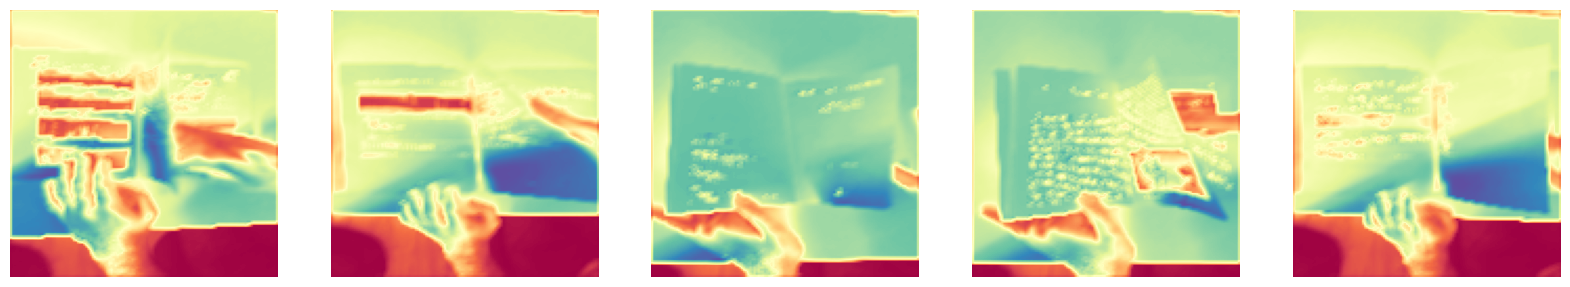

In [11]:
imgs = load_random_images(img_directory="./images/test/flip/",
                          n_images=5,
                          color_mode="grayscale", 
                          target_size=(128, 128))
processed_imgs = preprocess_images(imgs=imgs)
feature_map(processed_imgs=processed_imgs)

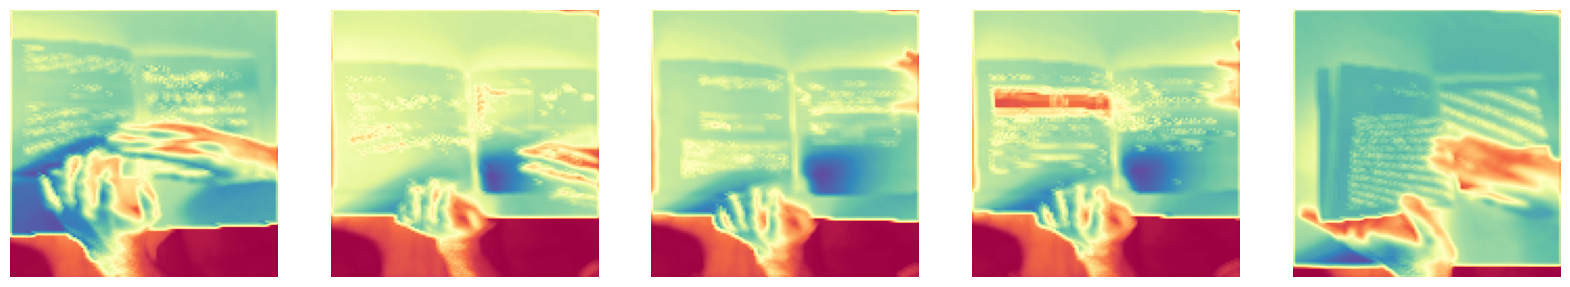

In [12]:
imgs = load_random_images(img_directory="./images/test/not_flip/",
                          n_images=5,
                          color_mode="grayscale", 
                          target_size=(128, 128))
processed_imgs = preprocess_images(imgs=imgs)
feature_map(processed_imgs=processed_imgs)

## Conclusion

Our analysis culminates with the model demonstrating exceptional performance, achieving an **F1 score exceeding 0.995**. This remarkable level of accuracy underscores the model's robustness and its capacity to make highly reliable predictions.

Further, the exploration through feature map visualization sheds light on the inner workings of the Convolutional Neural Network. These visual insights reveal the model's remarkable ability to discern critical elements such as books and hands, effectively distinguishing them from other components that could introduce noise into the analysis.

This dual achievement not only confirms the model's theoretical capabilities but also showcases its practical efficiency in filtering out irrelevant data, thus honing its focus on the essential features for accurate classification. It's a compelling demonstration of the model's adeptness at navigating complex visual data, making it a valuable tool for applications requiring nuanced image recognition and interpretation.